# Intepretation

In [13]:
from config import plotly_id, plotly_key
import classifiers as clf

import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pickle

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

### Load Estimators

In [14]:
baseline = pd.read_pickle("../Data/baseline.pkl")
balanced = pd.read_pickle("../Data/balanced.pkl")
y_labels = pd.read_pickle("../Data/y_labels.pkl")

### Confusion Matrix

In [15]:
# best estimators of test sets
best_estimators = pd.concat([
    baseline[baseline['Split'] == 'Test'],
    balanced[balanced['Split'] == 'Test']],
    ignore_index=True)

best_estimators

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Baseline,Dummy,{'strategy': 'most_frequent'},Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
1,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
2,Baseline,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 100}",Test,0.751982,0.638906,0.751982,0.683705,"[[1685, 0, 83], [137, 0, 10], [333, 0, 22]]"
3,Baseline,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
4,Baseline,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
5,Baseline,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 100}",Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
6,Balanced,Dummy,{'strategy': 'stratified'},Test,0.319824,0.615029,0.319824,0.391929,"[[579, 591, 598], [54, 40, 53], [132, 116, 107]]"
7,Balanced,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.402203,0.689159,0.402203,0.459020,"[[667, 286, 815], [34, 30, 83], [94, 45, 216]]"
8,Balanced,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200}",Test,0.334361,0.666442,0.334361,0.399962,"[[549, 648, 571], [50, 57, 40], [79, 123, 153]]"
9,Balanced,Decision Tree,"{'criterion': 'entropy', 'min_impurity_decreas...",Test,0.421145,0.711594,0.421145,0.498534,"[[769, 777, 222], [40, 105, 2], [94, 179, 82]]"


In [16]:
# plot accuracy
accuracy = best_estimators.pivot(index='Classifier',columns='Data',values='Accuracy')
accuracy = accuracy[['Baseline', 'Balanced']]
accuracy

Data,Baseline,Balanced
Classifier,,
Ada Boost,0.778855,0.411013
Decision Tree,0.778855,0.421145
Dummy,0.778855,0.319824
K Nearest Neighbors,0.751982,0.334361
Logistic Regression,0.778855,0.402203
Random Forest,0.778855,0.099119


In [17]:
# plot F1 scores
f1_scores = best_estimators.pivot(index='Classifier',columns='Data',values='F1 Score')
f1_scores = f1_scores[['Baseline', 'Balanced']]
f1_scores

Data,Baseline,Balanced
Classifier,,
Ada Boost,0.682028,0.484405
Decision Tree,0.682028,0.498534
Dummy,0.682028,0.391929
K Nearest Neighbors,0.683705,0.399962
Logistic Regression,0.682028,0.459020
Random Forest,0.682028,0.047221


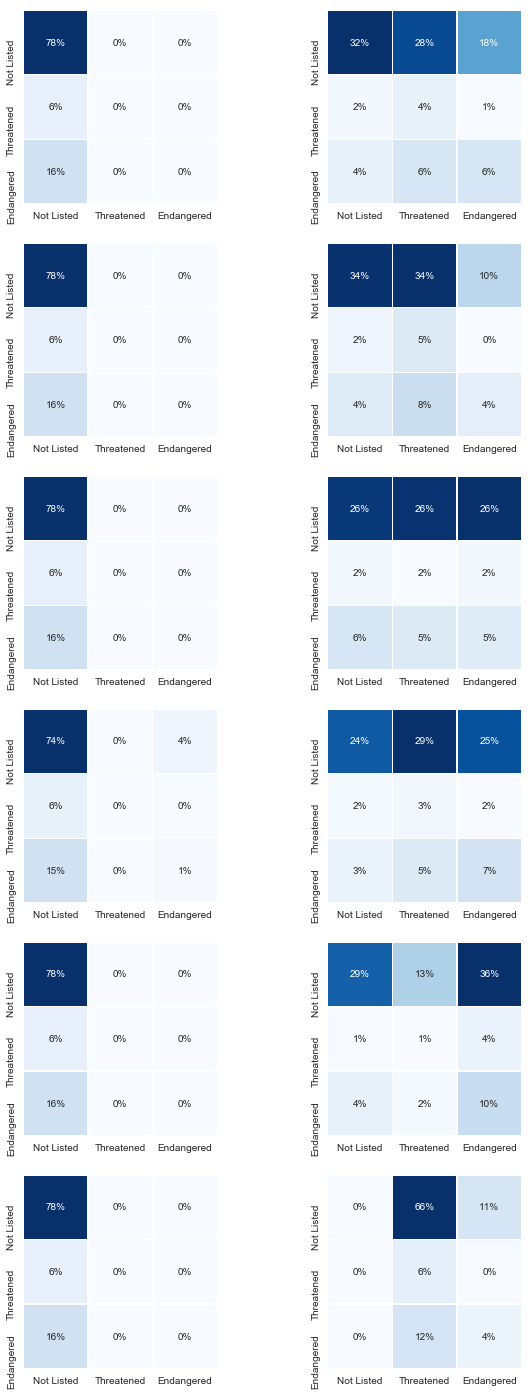

In [18]:
# plot confusion matrices
confusion_matrices = best_estimators.pivot(index='Classifier',columns='Data',values='Confusion Matrix')
confusion_matrices = confusion_matrices[['Baseline', 'Balanced']]
cm, axes = clf.plot_confusion_matrices(confusion_matrices, list(y_labels[0]))

### Feature Importance

In [ ]:
grid_searches[0]['Classifier'].best_estimator_.coef_[0]

In [ ]:
best_log_params = list(zip(X.columns, grid_searches[0]['Classifier'].best_estimator_.coef_[0]))
best_log_params.sort(key = lambda x: abs(x[1]), reverse=True)
best_log_params

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in best_log_params]

feature_weights = [abs(i[1]) for i in best_log_params]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)

# Show plot
plt.show()

### Classifier Performance

In [ ]:
# create performance visualization in Plotly
hover_text  = []
color_range = []

for index, row in baseline.iterrows():
    hover_text.append(('Parameters: {params}<br>'+
                       'Split: {split}').format(params=row['Parameters'],
                                                split=row['Split']))
#    color_range.append(min(row['Dogs per Store'],120))

trace0 = go.Scatter(
    x=baseline['Accuracy'],
    y=baseline['F1 Score'],
    text=hover_text,
    mode='markers',
    marker=dict(
#        size=bcg_matrix['Stores'],
#        color=color_range,
        showscale=True,
        reversescale=True,
        colorbar=dict(
                title='Dogs Per Store'
            ),
        colorscale='RdBu'
    )
)

data = [trace0]
layout = go.Layout(
    title='Baseline',
    xaxis=dict(
        title='Model Performance Metric [Accuracy]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Model Performance Metric [F1 Score]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='endangered-species')